# Amazing RL Agent

In [1]:
import gymnasium as gym
import torch
import numpy as np
import importlib

# Render screen, set to false if training
RENDER_AGENT = True


In [2]:
# Test pytorch is working

x = torch.rand(size=(1000,))
x = x + 1

# If you have a nvidia gpu with torch installed correctly
# you can move the tensors to the gpu for some extra
# speed, not necessary although.
DEVICE = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f"Using {DEVICE}")
# When creating a new tensor make sure you move it to a
# device using .to(DEVICE), such as:
x = x.to(DEVICE)
# The tensor in x has been moved to the device


Using cpu


In [11]:
# Import agent
import agents
import ddpg

# Reload module as jupyter notebooks wont update to any changes youve made
importlib.reload(
    agents,
)
importlib.reload(
    ddpg,
)
#agent = agents.Agent()

#agent = agents.TD3(3, 1, 2)
agent = ddpg.DDPG(24, 4, 1, batch_size=32)
scores = []
import matplotlib.pyplot as plt


Episode: 0, Reward: -221.9055758859534, Memory Size: 131072
Episode: 1, Reward: -105.83271495584627, Memory Size: 131072
Episode: 2, Reward: -147.93059072436577, Memory Size: 131072
Episode: 3, Reward: -100.88946171062062, Memory Size: 131072
Episode: 4, Reward: -197.77929862538218, Memory Size: 131072
Episode: 5, Reward: -100.05669898222956, Memory Size: 131072
Episode: 6, Reward: -162.7136151580146, Memory Size: 131072
Episode: 7, Reward: -105.827470484774, Memory Size: 131072
Episode: 8, Reward: -80.81959792362319, Memory Size: 131072
Episode: 9, Reward: -343.16162970181324, Memory Size: 131072
Episode: 10, Reward: -200.44376911851919, Memory Size: 131072
Episode: 11, Reward: -383.7079541892095, Memory Size: 131072
Episode: 12, Reward: -508.95190529095225, Memory Size: 131072
Episode: 13, Reward: -815.0205542345258, Memory Size: 131072
Episode: 14, Reward: -555.8566522018651, Memory Size: 131072
Episode: 15, Reward: -120.59676999875167, Memory Size: 131072
Episode: 16, Reward: 23.38

KeyboardInterrupt: 

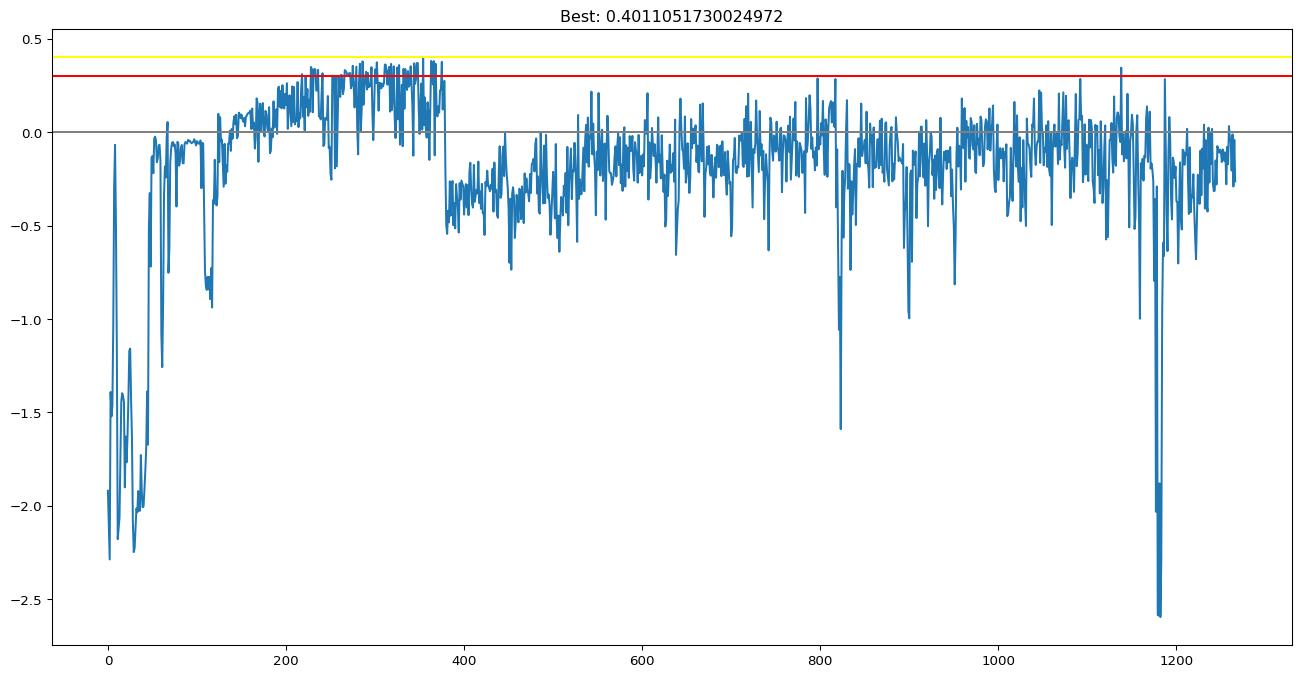

In [18]:
try:
    env.close()
except:
    pass

env = gym.make("BipedalWalker-v3", hardcore=True)#, render_mode="human")
plt.figure(figsize=(1600/96, 800/96), dpi=96)
observation, info = env.reset(seed=27)
steps_per_episode = 1000 # T
for episode in range(1000): # M
    rewards = 0
    step = 0
    while(step < steps_per_episode):
        action = agent.choose_action(observation, env.action_space)  # this is where you would insert your policy
        
        action = np.array(action)
        observation, reward, terminated, truncated, info = env.step(action)
        
        rewards += reward

        """reward_agent = reward * 10 if reward > 0 else (
            0 if reward > -10 else reward
        )"""
        reward_agent = 100 * reward if reward > 0 and episode < 450 else reward
        
        agent.update(observation, reward_agent, terminated, truncated)
        if terminated or truncated:
            observation, info = env.reset()

        step += 1
    scores.append(rewards)
    if episode % 1 == 0:
        m = max(scores) / steps_per_episode
        print(f"Episode: {episode}, Reward: {rewards}, Memory Size: {agent.memory.size}")
        plt.clf()
        plt.title(f"Best: {m}")
        plt.plot(np.array(scores) / steps_per_episode)
        plt.axhline(y=0, color="grey", linestyle="-")
        plt.axhline(y=m, color="yellow", linestyle="-")
        plt.axhline(y=300 / steps_per_episode, color="red")
        plt.savefig("training.png")
    #env.render()
    
    observation, info = env.reset()
    action = [0]
    #control.reset()
env.close()


In [72]:
torch.save(agent.actor.state_dict(), "modded_learning_ddpg_actor.pth")
torch.save(agent.critic.state_dict(), "modded_learning_ddpg_critic.pth")

In [ ]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(scores))], scores)
plt.show()